In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
steam = pd.read_csv('steam.csv')
descr = pd.read_csv('steam_description_data.csv')
file.head()
#descr.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [21]:
steam = steam.rename(columns = {'appid':'steam_appid'})
united_df = steam.merge(descr, on = 'steam_appid')

In [22]:
united_df.head()

,steam_appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,124534,3339,17612,317,10000000-20000000,7.19,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,3318,633,277,62,5000000-10000000,3.99,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,3416,398,187,34,5000000-10000000,3.99,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,1273,267,258,184,5000000-10000000,3.99,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,5250,288,624,415,5000000-10000000,3.99,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


In [23]:
united_df.drop(['release_date','achievements','average_playtime','median_playtime','owners','price','about_the_game','categories','publisher','short_description'],axis = 1,inplace=True)

In [24]:
# Creating a rating difference
united_df['rating_difference'] = united_df['positive_ratings'] - united_df['negative_ratings']

In [25]:
united_df.head()

,steam_appid,name,english,developer,platforms,required_age,genres,steamspy_tags,positive_ratings,negative_ratings,detailed_description,rating_difference
0,10,Counter-Strike,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,124534,3339,Play the world's number 1 online action game. ...,121195
1,20,Team Fortress Classic,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,3318,633,One of the most popular online action games of...,2685
2,30,Day of Defeat,1,Valve,windows;mac;linux,0,Action,FPS;World War II;Multiplayer,3416,398,Enlist in an intense brand of Axis vs. Allied ...,3018
3,40,Deathmatch Classic,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,1273,267,Enjoy fast-paced multiplayer gaming with Death...,1006
4,50,Half-Life: Opposing Force,1,Gearbox Software,windows;mac;linux,0,Action,FPS;Action;Sci-fi,5250,288,Return to the Black Mesa Research Facility as ...,4962


In [27]:
united_df.drop(united_df[united_df['rating_difference'] <= 10].index,inplace=True)

In [29]:
united_df.reset_index(drop=True)


,steam_appid,name,english,developer,platforms,required_age,genres,steamspy_tags,positive_ratings,negative_ratings,detailed_description,rating_difference
0,10,Counter-Strike,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,124534,3339,Play the world's number 1 online action game. ...,121195
1,20,Team Fortress Classic,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,3318,633,One of the most popular online action games of...,2685
2,30,Day of Defeat,1,Valve,windows;mac;linux,0,Action,FPS;World War II;Multiplayer,3416,398,Enlist in an intense brand of Axis vs. Allied ...,3018
3,40,Deathmatch Classic,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,1273,267,Enjoy fast-paced multiplayer gaming with Death...,1006
4,50,Half-Life: Opposing Force,1,Gearbox Software,windows;mac;linux,0,Action,FPS;Action;Sci-fi,5250,288,Return to the Black Mesa Research Facility as ...,4962
...,...,...,...,...,...,...,...,...,...,...,...,...
14092,1058430,A Legionary's Life,1,Alessandro Roberti,windows,0,Indie;RPG;Early Access,Early Access;RPG;Indie,22,8,<i>A Legionary's Life</i> lets you play as a R...,14
14093,1059090,The Underground Watcher/地下监察员,1,Yima VLG.,windows,0,Action;Indie,Action;Indie;Pixel Graphics,13,1,"<h2 class=""bb_tag"">Story</h2>Xu Sisi is a youn...",12
14094,1059280,The Renovator,1,mirzagame5,windows,0,Indie,Indie;Horror;Adventure,25,7,Art is fraught with mysteries. Pictures are be...,18
14095,1062670,Blacksmith Run,1,Skull Box Games,windows,0,Indie,Indie,13,0,<strong>Legend says the blacksmith who wants t...,13


In [30]:
# Removing games without English translation
united_df = united_df.drop(united_df[united_df['english'] == 0].index).reset_index(drop=True)

In [31]:
united_df.shape

(13839, 12)

In [40]:
united_df.head(50)

,steam_appid,name,english,developer,platforms,required_age,genres,steamspy_tags,positive_ratings,negative_ratings,detailed_description,rating_difference
0,10,Counter-Strike,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,124534,3339,Play the world's number 1 online action game. ...,121195
1,20,Team Fortress Classic,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,3318,633,One of the most popular online action games of...,2685
2,30,Day of Defeat,1,Valve,windows;mac;linux,0,Action,FPS;World War II;Multiplayer,3416,398,Enlist in an intense brand of Axis vs. Allied ...,3018
3,40,Deathmatch Classic,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,1273,267,Enjoy fast-paced multiplayer gaming with Death...,1006
4,50,Half-Life: Opposing Force,1,Gearbox Software,windows;mac;linux,0,Action,FPS;Action;Sci-fi,5250,288,Return to the Black Mesa Research Facility as ...,4962
5,60,Ricochet,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,2758,684,A futuristic action game that challenges your ...,2074
6,70,Half-Life,1,Valve,windows;mac;linux,0,Action,FPS;Classic;Action,27755,1100,Named Game of the Year by over 50 publications...,26655
7,80,Counter-Strike: Condition Zero,1,Valve,windows;mac;linux,0,Action,Action;FPS;Multiplayer,12120,1439,"With its extensive Tour of Duty campaign, a ne...",10681
8,130,Half-Life: Blue Shift,1,Gearbox Software,windows;mac;linux,0,Action,FPS;Action;Sci-fi,3822,420,Made by Gearbox Software and originally releas...,3402
9,220,Half-Life 2,1,Valve,windows;mac;linux,0,Action,FPS;Action;Sci-fi,67902,2419,1998. HALF-LIFE sends a shock through the game...,65483


### Some Visualizations

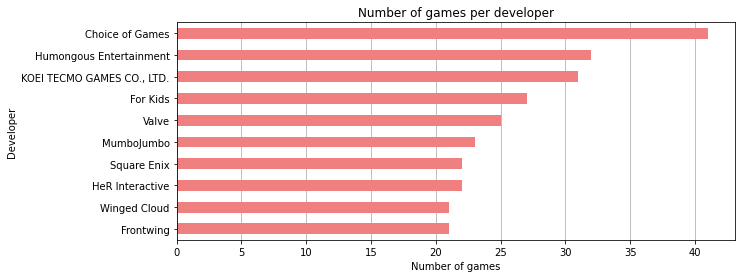

In [32]:
# Selecting the required part of the dataframe
dev_head = united_df['developer'].value_counts().head(10)

# Create a figure
fig1, ax1 = plt.subplots(figsize=(10,4))

# Building a graph from a series
dev_head.plot(kind='barh', color='lightcoral', ax=ax1)

# Changing the order of lines on the chart
plt.gca().invert_yaxis()

# Sign the axes and give the name
plt.title('Number of games per developer')
plt.xlabel('Number of games')
plt.ylabel('Developer')

# Draw vertical lines
plt.grid(axis='x')
ax1.set_axisbelow(True)
plt.show()

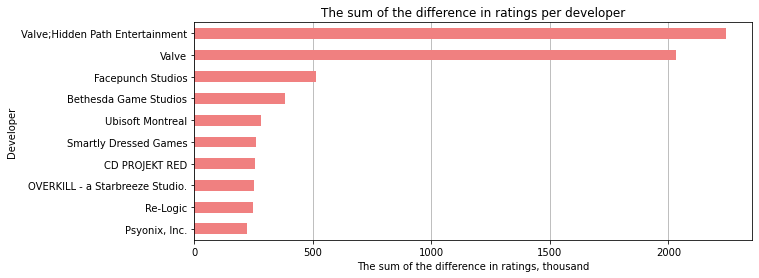

In [33]:
# Selecting the required part of the dataframe
group_sum = united_df.groupby('developer')['rating_difference'].sum()

# Divide values to improve display
head_mill = group_sum.sort_values(ascending=False).head(10)/1000

fig2, ax2 = plt.subplots(figsize=(10,4))

head_mill.plot(kind='barh', color='lightcoral', ax=ax2)

plt.gca().invert_yaxis()

plt.title('The sum of the difference in ratings per developer')
plt.xlabel('The sum of the difference in ratings, thousand')
plt.ylabel('Developer')

plt.grid(axis='x')
ax2.set_axisbelow(True)
plt.show()

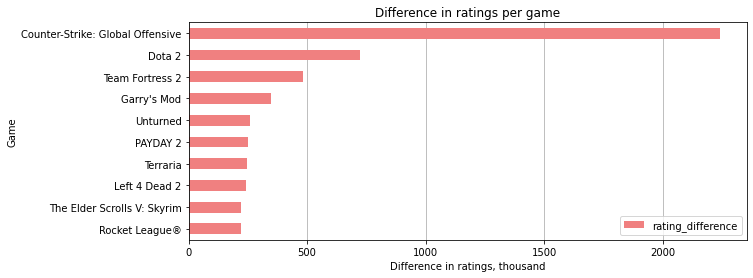

In [34]:
# Repeat all the same
diff_sort = united_df.sort_values(by='rating_difference', ascending=False).head(10)
diff_sort['rating_difference'] = diff_sort['rating_difference']/1000

fig3, ax3 = plt.subplots(figsize=(10,4))

diff_sort.plot(kind='barh', y='rating_difference', x='name', color='lightcoral', ax=ax3)

plt.gca().invert_yaxis()

plt.title('Difference in ratings per game')
plt.xlabel('Difference in ratings, thousand')
plt.ylabel('Game')

plt.grid(axis='x')
ax3.set_axisbelow(True)
plt.show()

### Data PreProcessing for NLP

In [36]:
# Separating tags with a space
def globalization(strok:str):
    return strok.replace(';', ' ')

# Removing duplicate tags
def del_rep(strok:str):
    spl_strok = strok.split()
    return ' '.join(sorted(set(spl_strok), key=spl_strok.index))

# Converting to lower case
def to_low(strok:str):
    return strok.lower()

In [41]:
# Seperating ; with space
united_df['genres'] = united_df['genres'].apply(globalization)
united_df['steamspy_tags'] = united_df['steamspy_tags'].apply(globalization)
united_df['developer'] = united_df['developer'].apply(globalization)
united_df['platforms'] = united_df['platforms'].apply(globalization)

# Combining genres and tags
united_df['genres&tags'] = united_df['genres'] + ' ' + united_df['steamspy_tags']
united_df['dev&platform'] = united_df['developer'] + ' ' + united_df['platforms']

# Removing duplicate tags
united_df['genres&tags'] = united_df['genres&tags'].apply(del_rep)

# Convert strings to lowercase and concatenate into one column
cols = ['dev&platform', 'genres&tags']
united_df['alls'] = united_df['name'].copy().apply(to_low)
for i in cols:
  united_df['alls'] += ' ' + united_df[i].apply(to_low)




In [42]:
# How it looks
united_df['alls']

0        counter-strike valve windows mac linux action ...
1        team fortress classic valve windows mac linux ...
2        day of defeat valve windows mac linux action f...
3        deathmatch classic valve windows mac linux act...
4        half-life: opposing force gearbox software win...
                               ...                        
13834    a legionary's life alessandro roberti windows ...
13835    the underground watcher/地下监察员 yima vlg. window...
13836    the renovator mirzagame5 windows indie horror ...
13837         blacksmith run skull box games windows indie
13838    captainmarlene dnovel windows adventure indie ...
Name: alls, Length: 13839, dtype: object

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert a collection of text documents to a matrix of token counts
count_vec = CountVectorizer(stop_words='english')
count_matrix = count_vec.fit_transform(united_df['alls'])

# Compute cosine similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [49]:
# Convert a collection of raw documents to a matrix of TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(united_df['detailed_description'])

# Stack sparse matrices horizontally
st = hstack([count_matrix, tfidf_matrix])

# Compute cosine similarity
cosine_sim2 = cosine_similarity(st, st)

In [51]:
print(st)

  (0, 419)	1.0
  (0, 3624)	1.0
  (0, 6209)	1.0
  (0, 9580)	1.0
  (0, 9904)	1.0
  (0, 11004)	1.0
  (0, 15981)	1.0
  (0, 17546)	1.0
  (0, 18274)	1.0
  (1, 419)	1.0
  (1, 3185)	1.0
  (1, 6174)	1.0
  (1, 6209)	1.0
  (1, 9580)	1.0
  (1, 9904)	1.0
  (1, 11004)	1.0
  (1, 16472)	1.0
  (1, 17546)	1.0
  (1, 18274)	1.0
  (2, 419)	1.0
  (2, 4142)	1.0
  (2, 4247)	1.0
  (2, 6209)	1.0
  (2, 7947)	1.0
  (2, 9580)	1.0
  :	:
  (13838, 104043)	0.08808171570372914
  (13838, 101467)	0.147949764475676
  (13838, 81785)	0.2585483473825869
  (13838, 41549)	0.12605145615496638
  (13838, 79068)	0.14391458903742718
  (13838, 77376)	0.15718291904126216
  (13838, 33595)	0.0931086588400555
  (13838, 93772)	0.3474004977641206
  (13838, 37407)	0.12260864456776802
  (13838, 90335)	0.1508215877096623
  (13838, 34376)	0.11288891702820021
  (13838, 79246)	0.08846954525008219
  (13838, 48627)	0.2008918437712458
  (13838, 78498)	0.11123404289594162
  (13838, 38935)	0.11226220594225045
  (13838, 41776)	0.09407902770546171
  

## Main Function

In [62]:
def get_rec(nam:str, cosine):
#     Determine the index
    try:
        ind = united_df[united_df['name'] == nam].index.to_list()[0]
    
    
#     Obtaining cosine convergence by index
        cos_scor = list(enumerate(cosine[ind]))
    
#     Getting the most suitable games
        cos_scor = sorted(cos_scor, key=lambda x: x[1], reverse=True)
        cos_scor = cos_scor[1:11]
        ten_ind = [i[0] for i in cos_scor]
        return united_df['name'].iloc[ten_ind]
    except:
        print("Enter the name from the list")

In [57]:
# Example 1
naz = "S.T.A.L.K.E.R.: Shadow of Chernobyl"
print('Recommendation for', naz, '\n')
print('Recommendations using game name, developer, genre, tags, and platform \n')
print(get_rec(naz, cosine_sim),'\n')
print(print('Recommendations using game name, developer, genre, tags, platform and description \n'))
print(get_rec(naz, cosine_sim2))

Recommendation for S.T.A.L.K.E.R.: Shadow of Chernobyl 

Recommendations using game name, developer, genre, tags, and platform 

655                       S.T.A.L.K.E.R.: Call of Pripyat
378                             S.T.A.L.K.E.R.: Clear Sky
410                                             Fallout 3
4512                                            Fallout 4
797                                              Gothic 1
415                   Fallout 3: Game of the Year Edition
416                                    Fallout: New Vegas
2301                   Hard Truck Apocalypse / Ex Machina
9335                                         Fallout 4 VR
1272    Sea Dogs: To Each His Own - Pirate Open World RPG
Name: name, dtype: object 

Recommendations using game name, developer, genre, tags, platform and description 

None
655                       S.T.A.L.K.E.R.: Call of Pripyat
378                             S.T.A.L.K.E.R.: Clear Sky
410                                             Fallout 3


In [64]:
## My Favorite
naz = "Counter-Strike"
print('Recommendation for', naz, '\n')
print('Recommendations using game name, developer, genre, tags, and platform \n')
print(get_rec(naz, cosine_sim),'\n')
print(print('Recommendations using game name, developer, genre, tags, platform and description \n'))
print(get_rec(naz, cosine_sim2))

Recommendation for Counter-Strike 

Recommendations using game name, developer, genre, tags, and platform 

10              Counter-Strike: Source
7       Counter-Strike: Condition Zero
5                             Ricochet
3                   Deathmatch Classic
1                Team Fortress Classic
13             Half-Life 2: Deathmatch
25    Counter-Strike: Global Offensive
15        Half-Life Deathmatch: Source
19                     Team Fortress 2
2                        Day of Defeat
Name: name, dtype: object 

Recommendations using game name, developer, genre, tags, platform and description 

None
10              Counter-Strike: Source
7       Counter-Strike: Condition Zero
5                             Ricochet
3                   Deathmatch Classic
1                Team Fortress Classic
25    Counter-Strike: Global Offensive
13             Half-Life 2: Deathmatch
19                     Team Fortress 2
15        Half-Life Deathmatch: Source
2                        Day of De

In [63]:
naz = "Valorant"
print('Recommendation for', naz, '\n')
print('Recommendations using game name, developer, genre, tags, and platform \n')
print(get_rec(naz, cosine_sim),'\n')
print(print('Recommendations using game name, developer, genre, tags, platform and description \n'))
print(get_rec(naz, cosine_sim2))

Recommendation for Valorant 

Recommendations using game name, developer, genre, tags, and platform 

Enter the name from the list
None 

Recommendations using game name, developer, genre, tags, platform and description 

None
Enter the name from the list
None
